## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%notebook inline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

## Reading file and checking head

In [3]:
df = pd.read_csv("ifood_df.csv")

In [4]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


## Data Analysis 

In [5]:
df.shape

(2205, 39)

In [6]:
df.isna().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [7]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [8]:
df.dtypes

Income                  float64
Kidhome                   int64
Teenhome                  int64
Recency                   int64
MntWines                  int64
MntFruits                 int64
MntMeatProducts           int64
MntFishProducts           int64
MntSweetProducts          int64
MntGoldProds              int64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
AcceptedCmp3              int64
AcceptedCmp4              int64
AcceptedCmp5              int64
AcceptedCmp1              int64
AcceptedCmp2              int64
Complain                  int64
Z_CostContact             int64
Z_Revenue                 int64
Response                  int64
Age                       int64
Customer_Days             int64
marital_Divorced          int64
marital_Married           int64
marital_Single            int64
marital_Together          int64
marital_Widow             int64
educatio

In [9]:
sns.set_style("darkgrid")

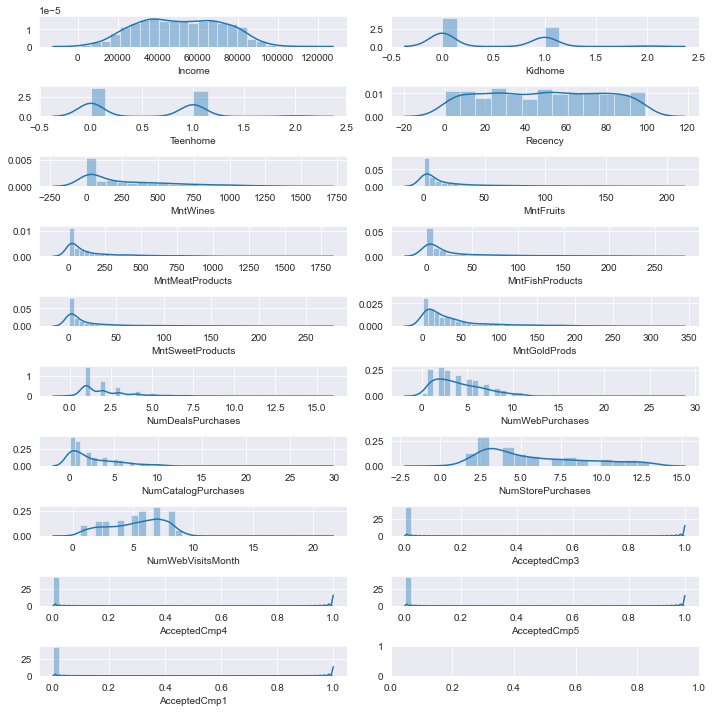

In [10]:
plt.figure(figsize=(10,10))
for i, col in enumerate(df.columns, 1):
    plt.subplot(10, 2, i)
    if i==20:
        break
    sns.distplot(df[col])
    plt.tight_layout()

C:\Users\Divyansh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Divyansh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Divyansh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Divyansh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


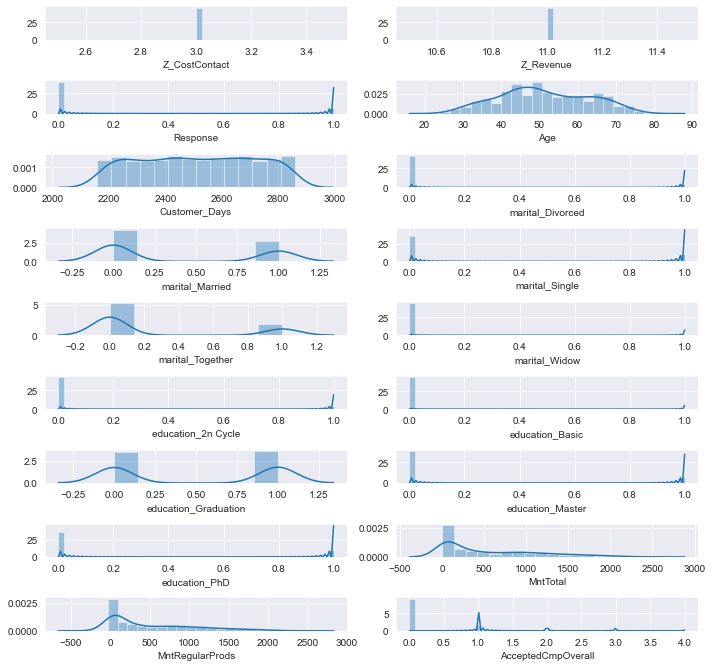

In [11]:
plt.figure(figsize=(10,10))
for i, col in enumerate(df.columns[21:], 1):
    plt.subplot(10, 2, i)
    sns.distplot(df[col])
    plt.tight_layout()

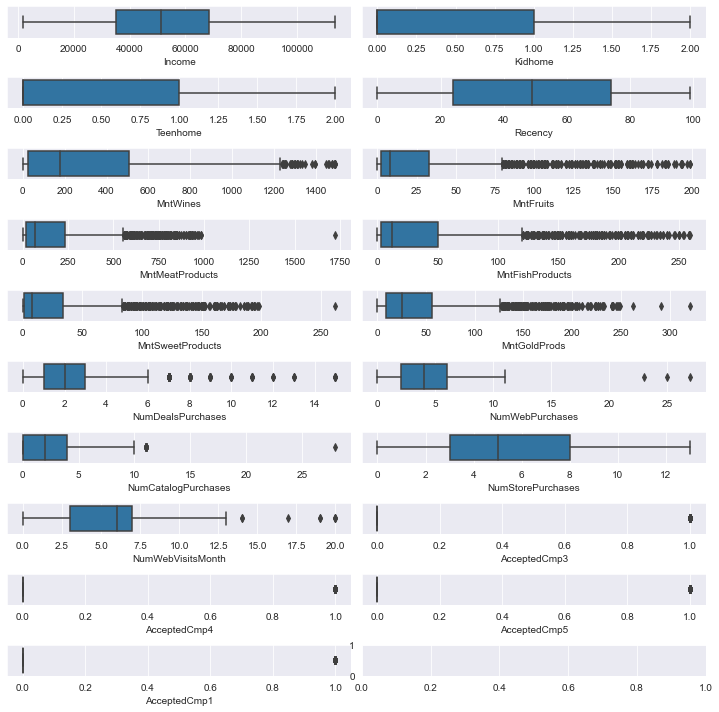

In [12]:
plt.figure(figsize=(10,10))
for i, col in enumerate(df.columns, 1):
    plt.subplot(10, 2, i)
    if i==20:
        break
    sns.boxplot(df[col])
    plt.tight_layout()

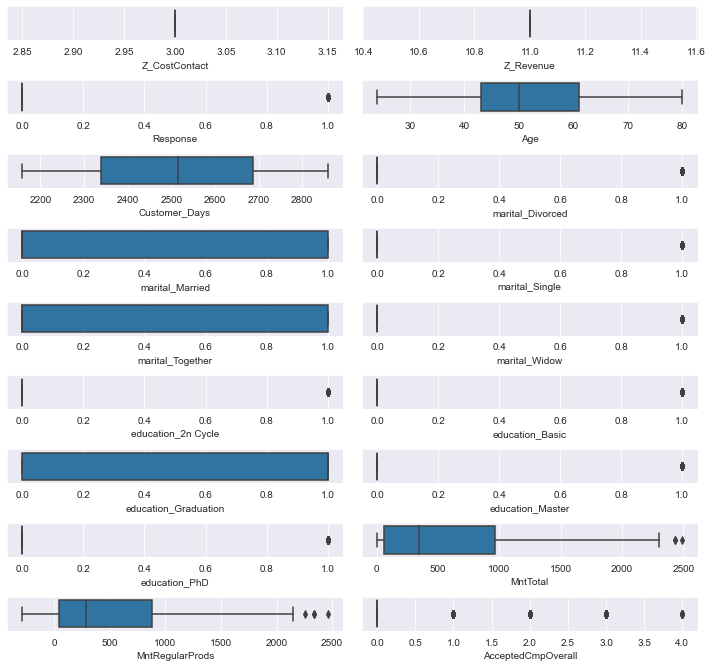

In [13]:
plt.figure(figsize=(10,10))
for i, col in enumerate(df.columns[21:], 1):
    plt.subplot(10, 2, i)
    sns.boxplot(df[col])
    plt.tight_layout()

## Initializing ML Models 

In [14]:
models = {
    "                           Decsion Tree": DecisionTreeClassifier(),
    "                    Logisitc Regression": LogisticRegression(),
    "                  K-Nearest Neighbors": KNeighborsClassifier(),
    "               Support Vector Machine": SVC(),
}

## Defining Utility Functions 

In [15]:
def train(X_train, y_train):
    for name, model in models.items():
        model.fit(X_train, y_train)
        print(name + " trained.")

In [16]:
def test(X_train, X_test, y_train, y_test):
    for name, model in models.items():
        print(name)
        print("--------------------"*3)
        print("Testing Accuracy: {:.5f}".format(model.score(X_test, y_test)))
        print("Training Accuracy: {:.5f}".format(model.score(X_train, y_train)))
        print("--------------------"*3)
        print('\n')


In [17]:
def split(df, cols):
    X = df[cols]
    y = df["Response"]
    
    cols = X.columns
    
    if "Response" in X.columns:
        X.drop("Response", axis=1, inplace=True)

    scaler = StandardScaler()

    X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    
    return X_train, X_test, y_train, y_test

    

In [18]:
def pipeline(X_train, X_test, y_train, y_test):
    train(X_train, y_train)
    print("\n\n")
    test(X_train, X_test, y_train, y_test)
    print("\n\n")

## Testing benchmark models 

In [19]:
X_train, X_test, y_train, y_test = split(df, df.columns)

pipeline(X_train, X_test, y_train, y_test)

                           Decsion Tree trained.
                    Logisitc Regression trained.
                  K-Nearest Neighbors trained.
               Support Vector Machine trained.



                           Decsion Tree
------------------------------------------------------------
Testing Accuracy: 0.83988
Training Accuracy: 0.99352
------------------------------------------------------------


                    Logisitc Regression
------------------------------------------------------------
Testing Accuracy: 0.90785
Training Accuracy: 0.89371
------------------------------------------------------------


                  K-Nearest Neighbors
------------------------------------------------------------
Testing Accuracy: 0.86858
Training Accuracy: 0.89695
------------------------------------------------------------


               Support Vector Machine
------------------------------------------------------------
Testing Accuracy: 0.88671
Training Accuracy: 0.92158
----

## Outlier Treatment

In [20]:
def removeOutliers(col, df):
    df1 = df.copy()
    df1["zscore_" + col] = ((df1[col]-df1[col].mean()) / df1[col].std())
    bool_series = np.abs(df1["zscore_" + col])<3
    df1 = df1[bool_series]
    display(df1.shape)
    print("outliers removed:", df.shape[0] - df1.shape[0])
    print("="*20)
    return df1

In [21]:
df1 = df.copy()

cols = ["MntFruits", "MntWines","MntMeatProducts", "MntFishProducts", "MntGoldProds", "NumDealsPurchases", 
        "NumCatalogPurchases", "MntTotal", "MntRegularProds"]

for col in cols:
    print(col)
    df1 = removeOutliers(col, df1)


MntFruits


(2141, 40)

outliers removed: 64
MntWines


(2124, 41)

outliers removed: 17
MntMeatProducts


(2075, 42)

outliers removed: 49
MntFishProducts


(2024, 43)

outliers removed: 51
MntGoldProds


(1972, 44)

outliers removed: 52
NumDealsPurchases


(1945, 45)

outliers removed: 27
NumCatalogPurchases


(1901, 46)

outliers removed: 44
MntTotal


(1887, 47)

outliers removed: 14
MntRegularProds


(1876, 48)

outliers removed: 11


In [22]:
print("toatal outliers removed:", df.shape[0]-df1.shape[0])

toatal outliers removed: 329


In [23]:
X_train, X_test, y_train, y_test = split(df1, df1.columns)

pipeline(X_train, X_test, y_train, y_test)

                           Decsion Tree trained.
                    Logisitc Regression trained.
                  K-Nearest Neighbors trained.
               Support Vector Machine trained.



                           Decsion Tree
------------------------------------------------------------
Testing Accuracy: 0.84192
Training Accuracy: 0.99543
------------------------------------------------------------


                    Logisitc Regression
------------------------------------------------------------
Testing Accuracy: 0.90231
Training Accuracy: 0.92308
------------------------------------------------------------


                  K-Nearest Neighbors
------------------------------------------------------------
Testing Accuracy: 0.87922
Training Accuracy: 0.91775
------------------------------------------------------------


               Support Vector Machine
------------------------------------------------------------
Testing Accuracy: 0.88099
Training Accuracy: 0.92917
----

## Dimesionality Reduction

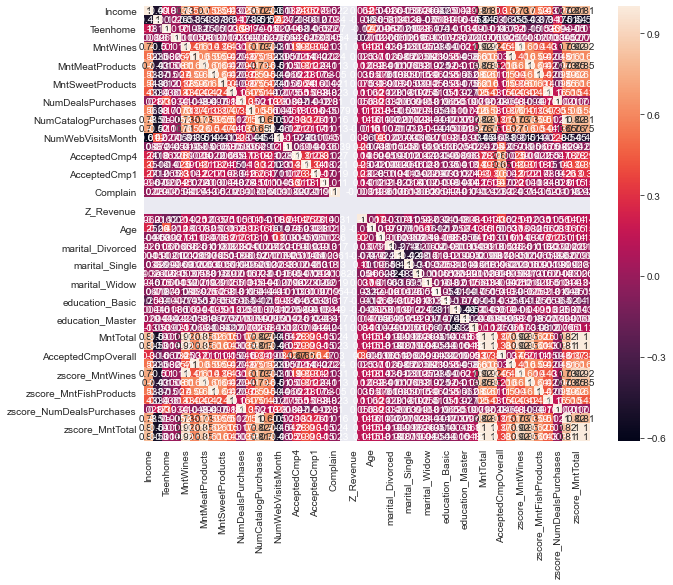

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(), annot=True)

In [25]:
corr = df1.corr()
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.7:
            if columns[j]:
                columns[j] = False

In [26]:
columns

array([ True,  True,  True,  True, False,  True, False,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False])

In [27]:
selected_columns = df1.columns[columns]

In [28]:
selected_columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntFruits',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'AcceptedCmpOverall'],
      dtype='object')

In [29]:
len(selected_columns)

33

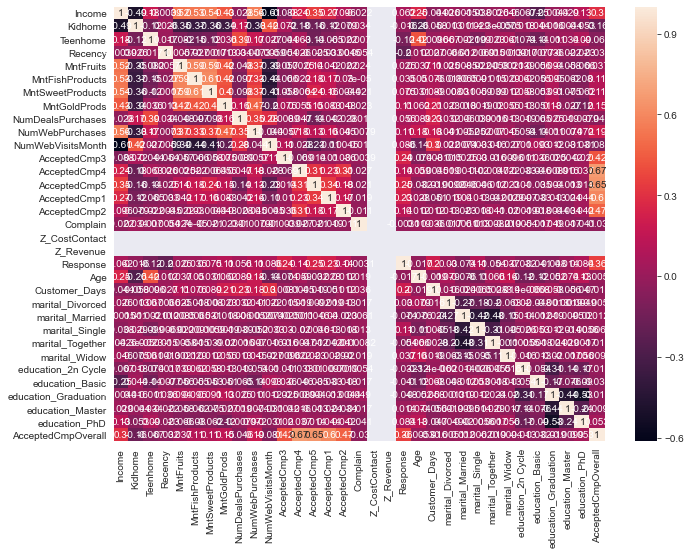

In [39]:
plt.figure(figsize=(11,8))
sns.heatmap(df1[selected_columns].corr(), annot=True)

In [31]:
X_train, X_test, y_train, y_test = split(df1, selected_columns)

pipeline(X_train, X_test, y_train, y_test)

C:\Users\Divyansh\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


                           Decsion Tree trained.
                    Logisitc Regression trained.
                  K-Nearest Neighbors trained.
               Support Vector Machine trained.



                           Decsion Tree
------------------------------------------------------------
Testing Accuracy: 0.85080
Training Accuracy: 0.99543
------------------------------------------------------------


                    Logisitc Regression
------------------------------------------------------------
Testing Accuracy: 0.89520
Training Accuracy: 0.91851
------------------------------------------------------------


                  K-Nearest Neighbors
------------------------------------------------------------
Testing Accuracy: 0.88099
Training Accuracy: 0.91241
------------------------------------------------------------


               Support Vector Machine
------------------------------------------------------------
Testing Accuracy: 0.87567
Training Accuracy: 0.92688
----

## Feature Selection

In [32]:
tree = DecisionTreeClassifier()

X_train, X_test, y_train, y_test = split(df1, selected_columns)

tree.fit(X_train, y_train)

imp = tree.feature_importances_

C:\Users\Divyansh\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [33]:
for f,i in enumerate(imp):
    print("Feature:", f, " Importance:", i)

Feature: 0  Importance: 0.10900143282170521
Feature: 1  Importance: 0.012913618081577009
Feature: 2  Importance: 0.0
Feature: 3  Importance: 0.09636629911030048
Feature: 4  Importance: 0.05475305569775985
Feature: 5  Importance: 0.032357072846121306
Feature: 6  Importance: 0.08212459225438343
Feature: 7  Importance: 0.05488195119257379
Feature: 8  Importance: 0.04152267250715225
Feature: 9  Importance: 0.01336677154074101
Feature: 10  Importance: 0.029849720176355548
Feature: 11  Importance: 0.0
Feature: 12  Importance: 0.0
Feature: 13  Importance: 0.003944293241530133
Feature: 14  Importance: 0.0
Feature: 15  Importance: 0.003299800881802992
Feature: 16  Importance: 0.0
Feature: 17  Importance: 0.0
Feature: 18  Importance: 0.0
Feature: 19  Importance: 0.11414897993748954
Feature: 20  Importance: 0.14121930960027956
Feature: 21  Importance: 0.020091879711241212
Feature: 22  Importance: 0.005259057655373511
Feature: 23  Importance: 0.008866510604474638
Feature: 24  Importance: 0.0
Featu

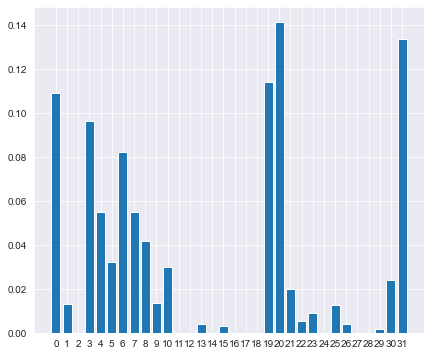

In [41]:
plt.figure(figsize=(7,6))
plt.bar([x for x in range(len(imp))], imp)
plt.xticks(range(32))
plt.show()

In [58]:
idx = [0,1,3,4,5,6,7,8,9,10,19,20,21,30,31]

In [59]:
imp_features = []
for i in range(len(idx)):
    imp_features.append(selected_columns[idx[i]])

In [60]:
imp_features

['Income',
 'Kidhome',
 'Recency',
 'MntFruits',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumWebVisitsMonth',
 'Response',
 'Age',
 'Customer_Days',
 'education_Master',
 'education_PhD']

In [61]:
X_train, X_test, y_train, y_test = split(df1, imp_features)

pipeline(X_train, X_test, y_train, y_test)

C:\Users\Divyansh\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


                           Decsion Tree trained.
                    Logisitc Regression trained.
                  K-Nearest Neighbors trained.
               Support Vector Machine trained.



                           Decsion Tree
------------------------------------------------------------
Testing Accuracy: 0.82238
Training Accuracy: 0.99467
------------------------------------------------------------


                    Logisitc Regression
------------------------------------------------------------
Testing Accuracy: 0.86856
Training Accuracy: 0.89109
------------------------------------------------------------


                  K-Nearest Neighbors
------------------------------------------------------------
Testing Accuracy: 0.86856
Training Accuracy: 0.89566
------------------------------------------------------------


               Support Vector Machine
------------------------------------------------------------
Testing Accuracy: 0.87567
Training Accuracy: 0.89109
----

## Decision Tree Hyperparameter Tuning

In [75]:
params = {
    'max_depth': [2, 3, 5, 10, 20, 30],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [80]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=101), param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1)

In [81]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 60 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.3s finished


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=101,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20, 30],
                   

In [82]:
grid_search.score(X_train, y_train)

0.8888042650418888

In [83]:
grid_search.score(X_test, y_test)

0.8756660746003553